In [1]:
import tensorflow as tf 
import pickle
import os 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
import seaborn as sn
import pandas as pd

from scipy.stats import truncnorm
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.datasets import cifar10
from skimage.transform import resize
from scipy.linalg import sqrtm

In [2]:
def plot_graphs(model_name,bigacgan=False):
    if bigacgan:
        model_type = 'bigacgan'
    else:
        model_type = 'acgan'
    d_real_losses = pickle.load(open('history/{}/{}/evaluation/d_real_losses.p'.format(model_type,model_name), 'rb'))
    d_fake_losses = pickle.load(open('history/{}/{}/evaluation/d_fake_losses.p'.format(model_type,model_name), 'rb'))
    g_losses = pickle.load(open('history/{}/{}/evaluation/g_losses.p'.format(model_type,model_name), 'rb'))
    fids = pickle.load(open('history/{}/{}/{}_fids.p'.format(model_type,model_name,model_name), 'rb'))
    
    real_loss = [x['loss'] for x in d_real_losses]
    fake_loss = [x['loss'] for x in d_fake_losses]
    g_loss = [x['loss'] for x in g_losses]

    plt.plot(range(0,len(real_loss)), real_loss, label='d_real_loss')
    plt.plot(range(0,len(fake_loss)), fake_loss, label='d_fake_loss')
    plt.plot(range(0,len(g_losses)), g_loss, label='g_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()

    real_out_class = [x['out_aux_sparse_categorical_accuracy'] for x in d_real_losses]
    fake_out_class = [x['out_aux_sparse_categorical_accuracy'] for x in d_fake_losses]

    plt.plot(range(0,len(real_out_class)), real_out_class, label='real_aux_acc')
    plt.plot(range(0,len(fake_out_class)), fake_out_class, label='fake_aux_acc')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    
    f_loss = [x['out_fake_loss'] for x in d_real_losses]
    a_loss = [x['out_aux_loss'] for x in d_real_losses]
    plt.plot(range(0,len(real_loss)), f_loss, label='disc_loss')
    plt.plot(range(0,len(a_loss)), a_loss, label='aux_loss')
    plt.legend()
    plt.show()

    print('last 50 epochs fid mean: ', np.mean(fids[-50:]))
    plt.plot(range(0,len(fids)), fids, label='FID')
    plt.xlabel('epoch')
    plt.ylabel('FID')
    plt.legend()
    plt.show()
    print('Minimum FID: {} at index: {}'.format(min(fids), fids.index(min(fids))))


In [3]:
def plot_val_graphs(model_name, bigacgan=False):
    if bigacgan:
        model_type = 'bigacgan'
    else:
        model_type = 'acgan'
    
    d_real_losses = pickle.load(open('history/{}/{}/evaluation/d_real_losses.p'.format(model_type,model_name), 'rb'))
    val_losses = pickle.load(open('history/{}/{}/evaluation/val_losses.p'.format(model_type,model_name), 'rb'))
    
    loss = [x['out_aux_sparse_categorical_accuracy'] for x in d_real_losses]
    val_loss = [x['out_aux_sparse_categorical_accuracy'] for x in val_losses]

    plt.plot(range(0,len(loss)), loss, label='aux_accuracy')
    plt.plot(range(0,len(val_loss)), val_loss, label='val_aux_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()


In [4]:
def plot_d_losses_deconstructed(model_name):
    d_real_losses = pickle.load(open('history/acgan/{}/evaluation/d_real_losses.p'.format(model_name), 'rb'))
    d_fake_losses = pickle.load(open('history/acgan/{}/evaluation/d_fake_losses.p'.format(model_name), 'rb'))
    
    disc_loss = [x['out_fake_loss'] for x in d_real_losses]
    aux_loss = [x['out_aux_loss'] for x in d_real_losses]
    loss = [x['loss'] for x in d_real_losses]
    

    plt.plot(range(0,len(loss)), disc_loss, label='disc_loss')
    plt.plot(range(0,len(aux_loss)), aux_loss, label='aux_loss')
    plt.plot(range(0,len(loss)), loss, label='loss', linestyle='dashed')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()
    
    disc_loss = [x['out_fake_loss'] for x in d_fake_losses]
    aux_loss = [x['out_aux_loss'] for x in d_fake_losses]
    loss = [x['loss'] for x in d_fake_losses]
    
    plt.plot(range(0,len(loss)), disc_loss, label='disc_loss')
    plt.plot(range(0,len(aux_loss)), aux_loss, label='aux_loss')
    plt.plot(range(0,len(loss)), loss, label='loss', linestyle='dashed')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()

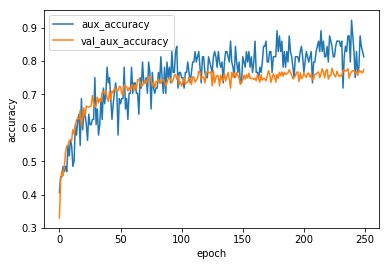

In [5]:
plot_val_graphs('bigacgan-cifar10-1', bigacgan=True)

## Collapse example when replicating AC-GAN

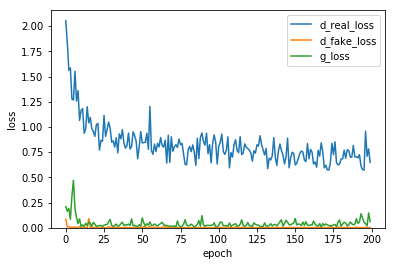

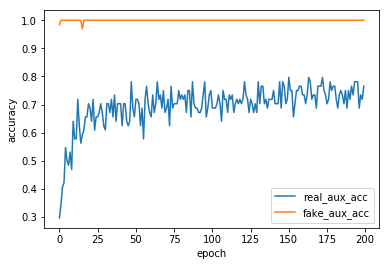

398.9346737116038


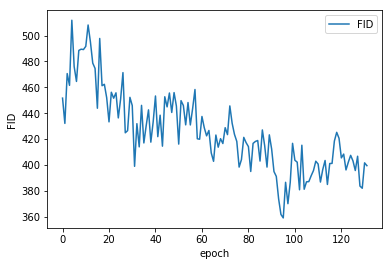

Minimum FID: 358.9081397742788 at index: 95


In [7]:
plot_graphs('acgan-cifar10-10')

## ACGAN 1

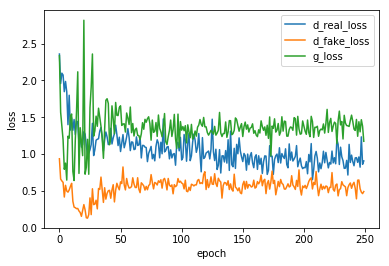

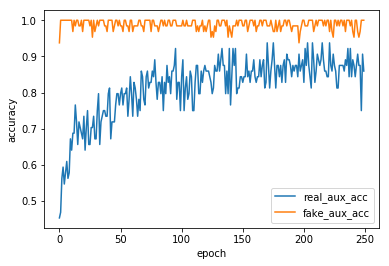

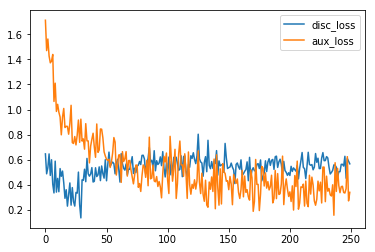

last 50 epochs fid mean:  71.56739054758503


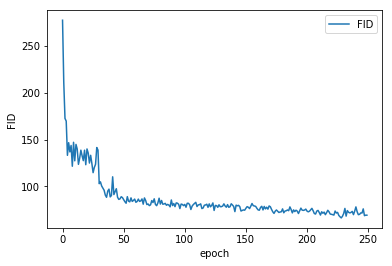

Minimum FID: 66.06831573085957 at index: 228


In [14]:
plot_graphs('acgan-cifar10-1')

## ACGAN 2

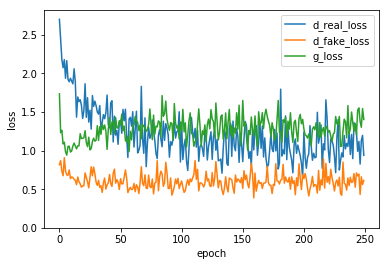

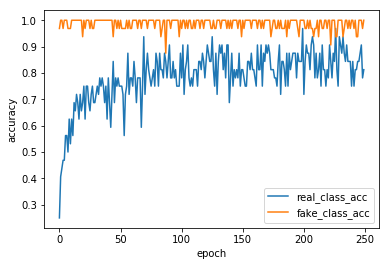

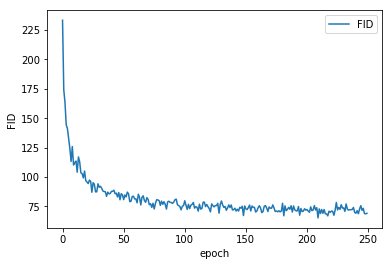

Minimum FID: 65.1641123932683 at index: 209


In [17]:
plot_graphs('acgan-cifar10-2')

## ACGAN 3

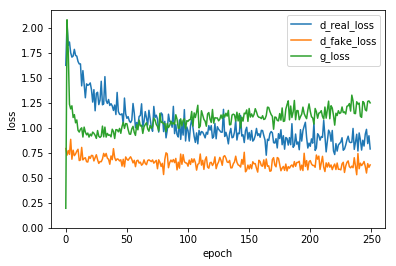

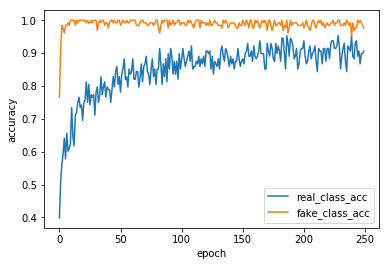

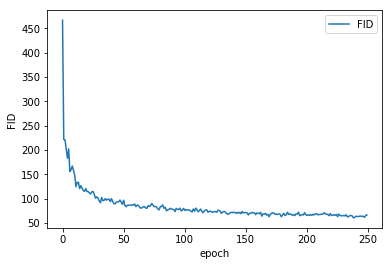

Minimum FID: 60.305632577216585 at index: 238


In [18]:
plot_graphs('acgan-cifar10-3')

## ACGAN 4

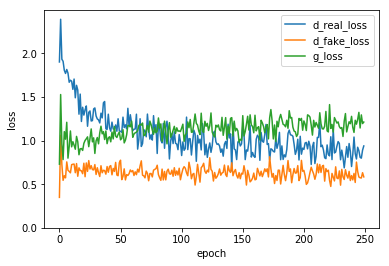

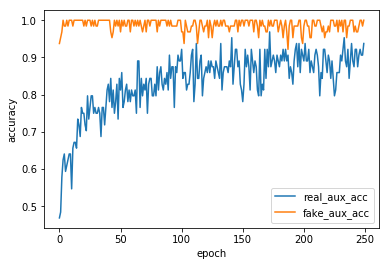

68.7795369762839


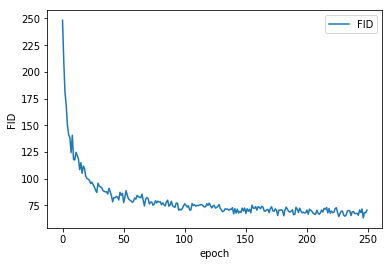

Minimum FID: 63.312746860608286 at index: 246


In [12]:
plot_graphs('acgan-cifar10-4')

## BigAC-GAN

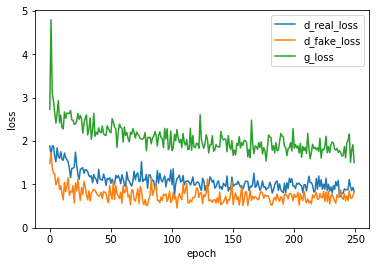

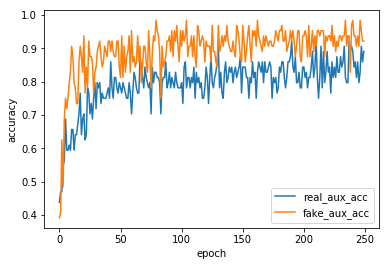

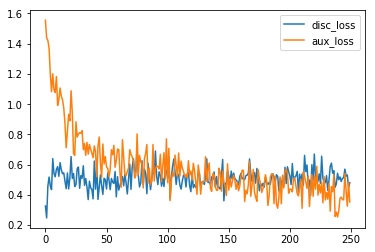

In [23]:
plot_graphs('bigacgan-cifar10-1', bigacgan=True)

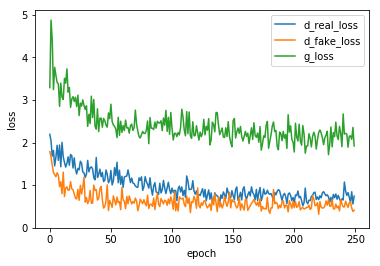

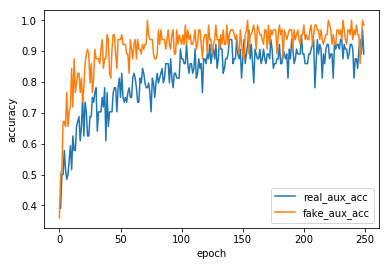

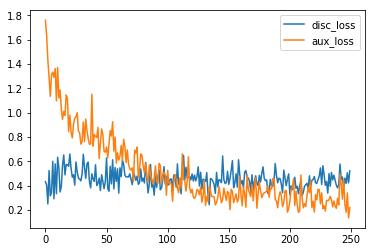

last 50 epochs fid mean:  26.04413527473243


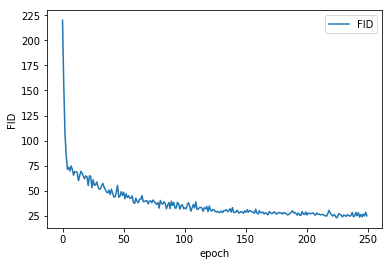

Minimum FID: 22.887686468598112 at index: 224


In [6]:
plot_graphs('bigacgan-cifar10-2', bigacgan=True)

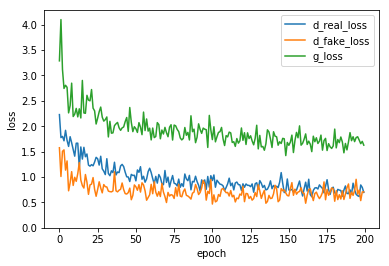

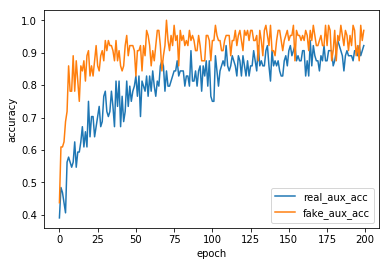

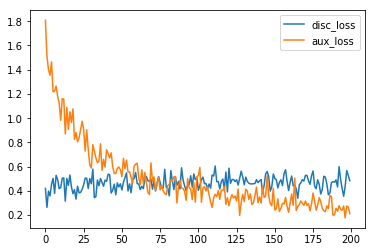

In [7]:
plot_graphs('bigacgan-cifar10-9', bigacgan=True)